# Black Friday Sales Prediction

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data Description
The dataset is acquired from an online data analytics hackathon hosted by Analytics Vidhya. The data contained features like age, gender, marital status, categories of products purchased, city demographics, purchase amount etc. The data consists of 12 columns and 537577 records. Our model will be predicting the purchase amount of the products.


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the train dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#impoting the test dataset
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [718]:
#Merging/Appending both train and test data
df=df_train.append(df_test)
df.head()

C:\Users\JOSEPH\AppData\Local\Temp\ipykernel_8368\85706694.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [719]:
df.shape

(783667, 12)

In [720]:
#Basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [721]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [722]:
#Handling Missing Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [723]:
#Replacing missing values --> Product Category 2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [724]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [725]:
#Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [726]:
df['Product_Category_2'].isnull().sum()

0

In [727]:
#Replacing missing values --> Product Category 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [728]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [729]:
#Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [730]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [731]:
#Unique Elements in each attributes
df.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop User_ID and Product_ID as it has more unique values

In [732]:
df=df.drop(["User_ID","Product_ID"],axis=1)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


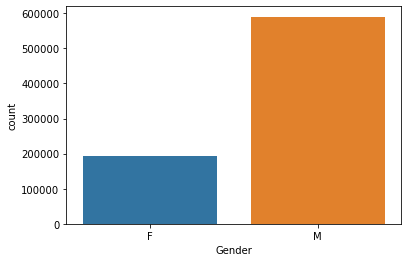

In [733]:
sns.countplot(df['Gender'])
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

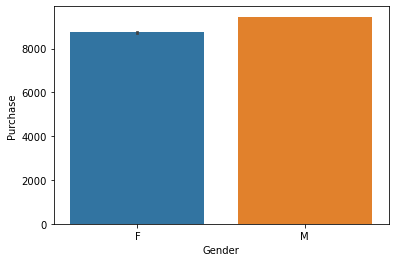

In [734]:
#Visualization of Gender Vs Purchase
sns.barplot('Gender', 'Purchase', data=df)

On average the male gender spends more money on purchase contrary to female

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


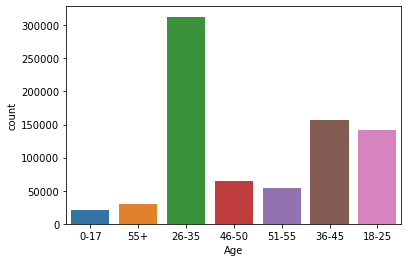

In [735]:
sns.countplot(df['Age'])
plt.show()

Age 26 -35 age group people makes the most no. of purchases

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

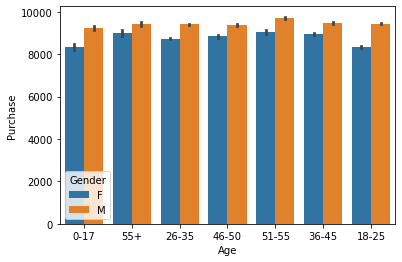

In [736]:
#Visualization of Age Vs Purchase
sns.barplot('Age', 'Purchase', hue='Gender', data=df)

Mean purchase rate tends to be the same except that the 51-55 age group has a little higher average purchase amount

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


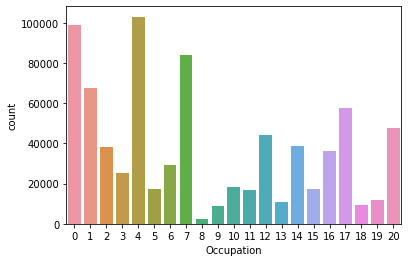

In [737]:
sns.countplot(df['Occupation'])
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

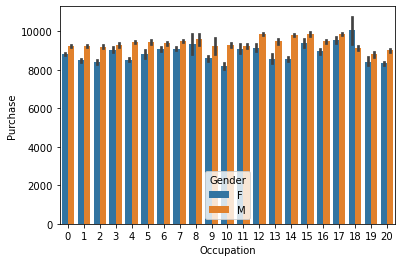

In [738]:
#Visualization of Occupation Vs Purchase
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df)

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


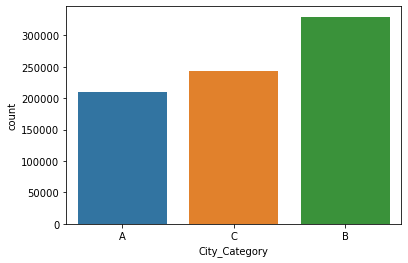

In [739]:
sns.countplot(df['City_Category'])
plt.show()

City Category B has made the most number of purchases

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

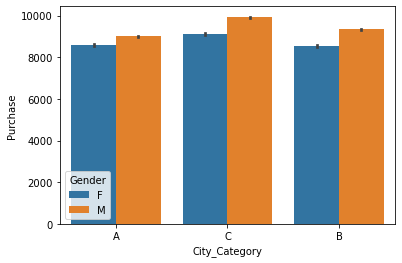

In [740]:
#Visualization of City_Category Vs Purchase
sns.barplot('City_Category', 'Purchase', hue='Gender', data=df)

The city whose buyers spend the most is city type 'C'

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


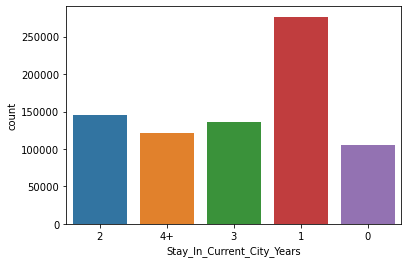

In [741]:
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

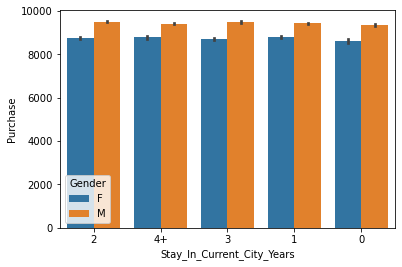

In [742]:
#Visualization of Stay_In_Current_City_Years Vs Purchase
sns.barplot('Stay_In_Current_City_Years', 'Purchase', hue='Gender', data=df)

We can see the same pattern. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years they have lived in their current city.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


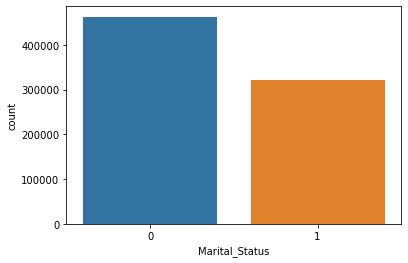

In [743]:
sns.countplot(df['Marital_Status'])
plt.show()

There are more unmarried people who purchases more

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

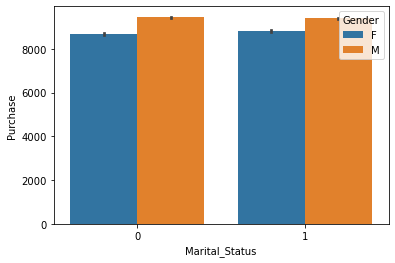

In [744]:
#Visualization of purchase with Marital_Status
sns.barplot('Marital_Status', 'Purchase', hue='Gender', data=df)

The average purchase amount of married and unmarried people are the same

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


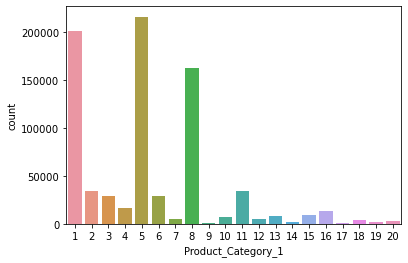

In [745]:
sns.countplot(df['Product_Category_1'])
plt.show()

Three products 1,5 and 8 were three most sold products

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

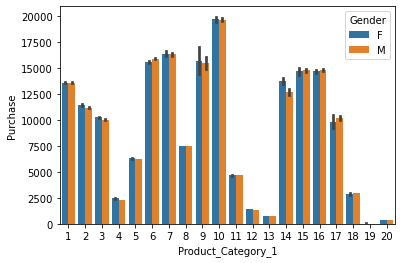

In [746]:
#Visualization of purchase with Product_Category_1
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df)

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


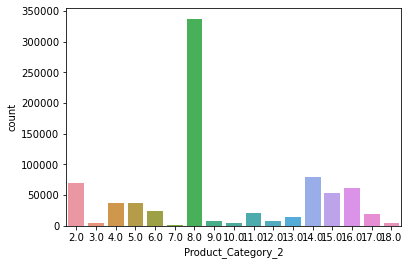

In [747]:
sns.countplot(df['Product_Category_2'])
plt.show()

Product 2,8 and 14 were three most sold products

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

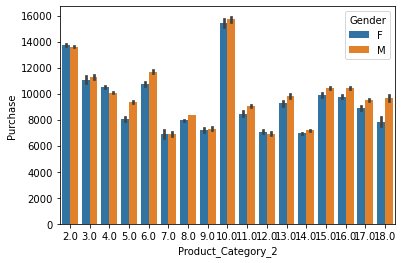

In [748]:
#Visualization of purchase with Product_Category_2
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df)

If you see the value spent on average for Product_Category_2 you see that although there were more products bought for categories 2,8,14 the average amount spent for 8 and 14 is not the highest. It is interesting to see categories 2 and other categories appearing with high purchase values despite having low impact on sales number.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


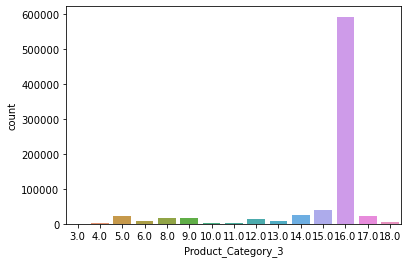

In [749]:
sns.countplot(df['Product_Category_3'])
plt.show()

16 was the most sold product

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

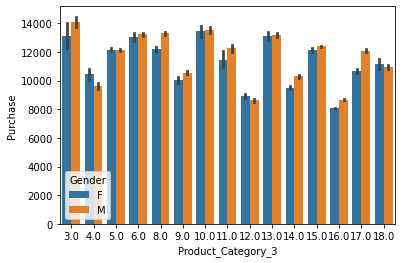

In [750]:
#Visualization of purchase with Product_Category_3
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df)

If you see the value spent on average for Product_Category_3 you see that although there were more products bought for categories 16 the average amount spent for it is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

In [751]:
#Handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,0,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [752]:
#Handling Categorical Feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [753]:
#Second technqiue
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Age']= label_encoder.fit_transform(df['Age']) 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [754]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,8.0,16.0,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,10,A,2,0,12,8.0,16.0,1422.0
3,0,0,10,A,2,0,12,14.0,16.0,1057.0
4,1,6,16,C,4+,0,8,8.0,16.0,7969.0


In [755]:
#Ssecond technqiue
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['City_Category']= label_encoder.fit_transform(df['City_Category']) 
df['City_Category'].unique()

array([0, 2, 1])

In [756]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1,6,16,2,4+,0,8,8.0,16.0,7969.0


In [757]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [758]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\JOSEPH\AppData\Local\Temp\ipykernel_8368\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [759]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1,6,16,2,4,0,8,8.0,16.0,7969.0


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int32  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 59.8+ MB


In [761]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int32  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(3), int64(4)
memory usage: 56.8 MB


In [762]:
df.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004758,0.116505,-0.003727,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346
Age,-0.004758,1.000000,0.090882,0.123415,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839
Occupation,0.116505,0.090882,1.000000,0.035336,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833
City_Category,-0.003727,0.123415,0.035336,1.000000,0.020564,0.040060,-0.018189,-0.003102,-0.022416,0.061914
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,0.020564,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422
Marital_Status,-0.010945,0.310747,0.023563,0.040060,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463
Product_Category_1,-0.046208,0.060336,-0.008441,-0.018189,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703
Product_Category_2,-0.011851,0.041716,0.001501,-0.003102,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651
Product_Category_3,-0.006651,0.036721,-0.001576,-0.022416,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


<AxesSubplot:>

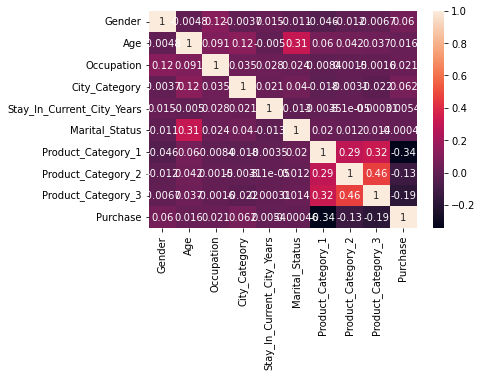

In [763]:
sns.heatmap(df.corr(), annot=True)

In [764]:
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [765]:
X=df_train.drop('Purchase',axis=1)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,8.0,16.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,8.0,16.0
3,0,0,10,0,2,0,12,14.0,16.0
4,1,6,16,2,4,0,8,8.0,16.0


In [766]:
X.shape

(550068, 9)

In [767]:
y=df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [768]:
y.shape

(550068,)

In [769]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [770]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [796]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [797]:
lr.intercept_

9261.58498313193

In [798]:
lr.coef_

array([  220.38284073,   160.71992324,    41.45362815,   258.47958479,
          10.56097374,   -28.15349803, -1594.84882073,    -4.41656523,
        -422.32534197])

In [799]:
y_pred = lr.predict(X_test)

In [800]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred)

3578.8468260648488

In [801]:
mean_squared_error(y_test, y_pred)

21951119.90689213

In [802]:
r2_score(y_test, y_pred)

0.1290024516663396

In [803]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4685.202226893961


In [778]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [779]:
dt_y_pred = regressor.predict(X_test)
mean_absolute_error(y_test, dt_y_pred)

2358.8281606540268

In [780]:
mean_squared_error(y_test, dt_y_pred)

11097395.800089931

In [781]:
r2_score(y_test, dt_y_pred)

0.5596669064829008

In [782]:
from math import sqrt
print("RMSE of Decision Tree Regressor model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Regressor model is  3331.2754014175907


In [783]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)  
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [784]:
rf_y_pred = RFregressor.predict(X_test)
mean_absolute_error(y_test, rf_y_pred)

2223.754662391167

In [785]:
mean_squared_error(y_test, rf_y_pred)

9328764.261667028

In [786]:
r2_score(y_test, rf_y_pred)

0.6298443616836382

In [787]:
from math import sqrt
print("RMSE of Random Forest Regressor Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Random Forest Regressor Model is  3054.3025818780675


In [788]:
#XGBoost Regressor
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1.0, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=40, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [789]:
xgb_y_pred = xgb_reg.predict(X_test)
xgb_y_pred

array([15668.769 , 13582.623 ,  7118.53  , ..., 11862.794 , 11243.789 ,
        6241.8105], dtype=float32)

In [790]:
mean_absolute_error(y_test, xgb_y_pred)

2160.3849646026956

In [791]:
mean_squared_error(y_test, xgb_y_pred)

8379734.786299965

In [792]:
r2_score(y_test, xgb_y_pred)

0.6675008616639221

In [793]:
from math import sqrt
print("RMSE of XGBoost Regressor Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Regressor Model is  2894.777156587354


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2898